In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

data = pd.read_csv('/content/sample_data/housing_data_cleaned.csv')

data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,prefarea_no,prefarea_yes,airconditioning_no,airconditioning_yes
0,10150000,8580,4,3,4,1,no,no,no,yes,2,yes,semi-furnished,False,True,False,True
1,9870000,8100,4,1,2,1,yes,yes,no,yes,2,yes,furnished,False,True,False,True
2,9800000,5750,3,2,4,1,yes,no,no,yes,1,yes,unfurnished,False,True,False,True
3,9681000,6000,4,3,2,1,yes,yes,yes,no,2,no,semi-furnished,True,False,True,False
4,9310000,6550,4,2,2,1,no,no,no,yes,1,yes,semi-furnished,False,True,False,True


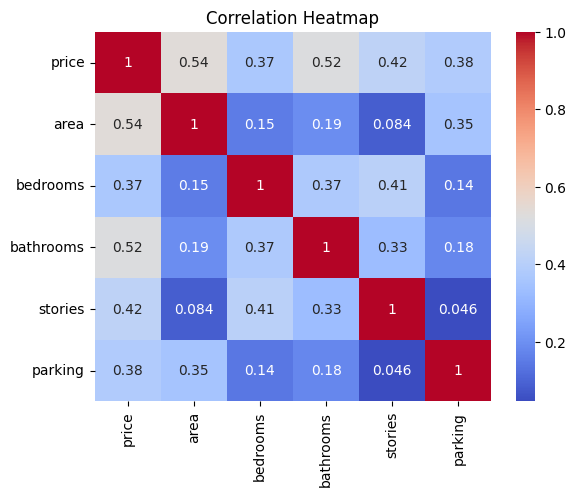

In [2]:
numeric_data = data.select_dtypes(include='number')
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
               # تحديد العلاقات بين الخصائص

--- نتائج نموذج الانحدار الخطي المتعدد ---
R² (R-squared): 0.6231


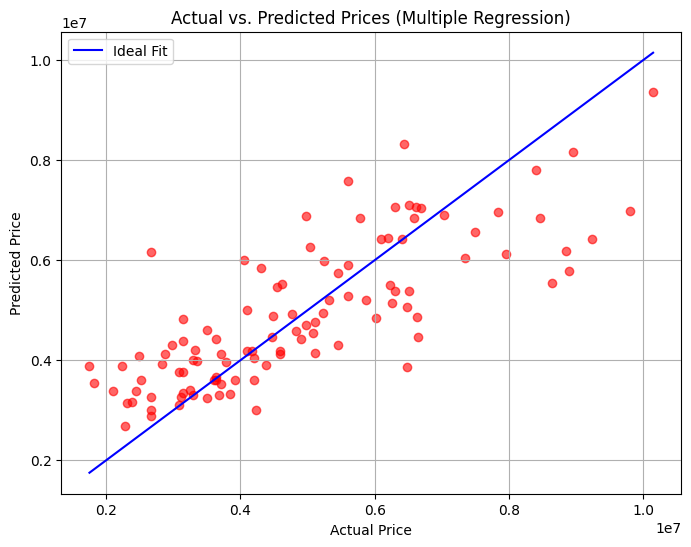

In [52]:

# 1. تعريف المتغيرات
X = data_cleaned_final[['area', 'bathrooms', 'stories', 'parking']]  # المتغيرات المستقلة المتعددة
Y = data_cleaned_final['price']               # المتغير التابع

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

# 4. التنبؤ باستخدام مجموعة الاختبار
Y_pred = model.predict(X_test)

# 5. تقييم النموذج وحساب المقاييس
print("--- Multiple Linear Regression Model Results ---")
r2_final = r2_score(Y_test, Y_pred)
print(f"R² (R-squared): {r2_final:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='red', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],
         color='blue', linestyle='-', label='Ideal Fit')
plt.title('Actual vs. Predicted Prices (Multiple Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

--- Main Performance Metrics for the Classification Model ---
Overall Accuracy: 0.8000
Precision (Expensive): 0.7778
Recall (Expensive): 0.8182


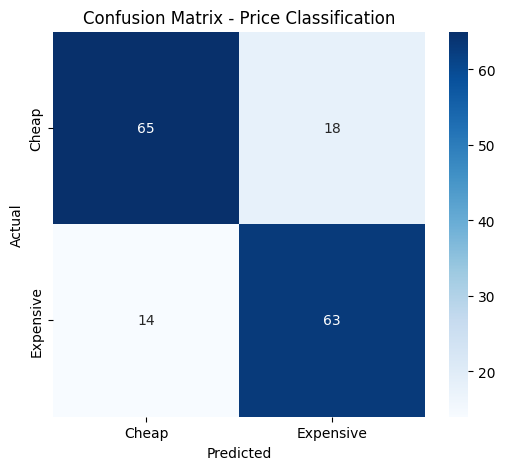

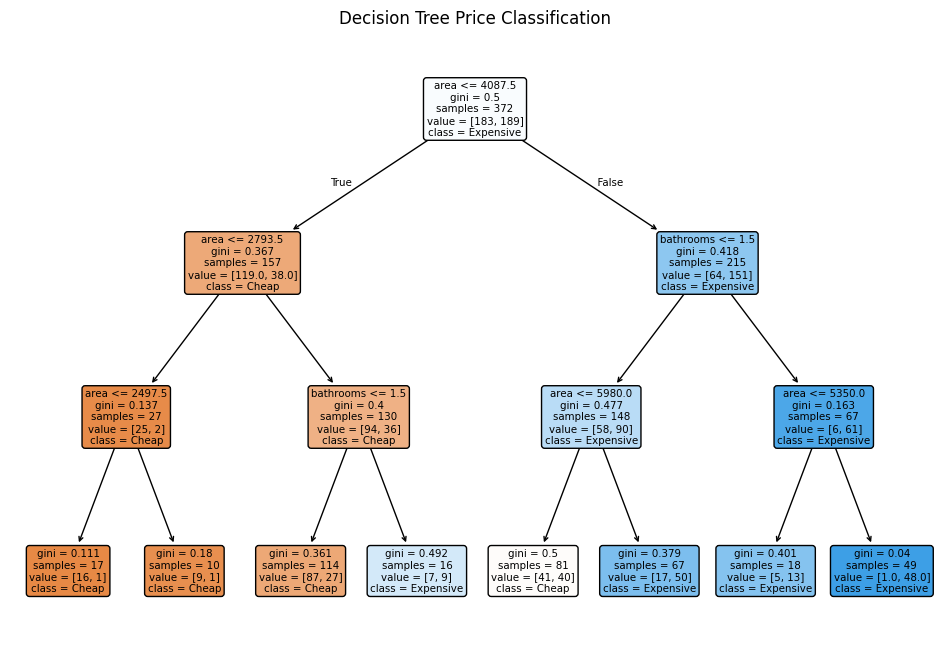

In [66]:
median_price = data_cleaned_final['price'].median()

data_cleaned_final['price_category'] = (data_cleaned_final['price'] > median_price).astype(int)

X = data_cleaned_final[['area', 'bathrooms']]
y = data_cleaned_final['price_category']

#  تدريب النموذج
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(min_samples_leaf=10, max_depth=3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("--- Main Performance Metrics for the Classification Model ---")

accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")


report = classification_report(y_test, y_pred, output_dict=True)


precision_expensive = report['1']['precision']
recall_expensive = report['1']['recall']

print(f"Precision (Expensive): {precision_expensive:.4f}")
print(f"Recall (Expensive): {recall_expensive:.4f}")


cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cheap', 'Expensive'], yticklabels=['Cheap', 'Expensive'])
plt.title('Confusion Matrix - Price Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


plt.figure(figsize=(12, 8))
plot_tree(clf,
          feature_names=X.columns,
          class_names=['Cheap', 'Expensive'],
          filled=True,
          rounded=True)
plt.title("Decision Tree Price Classification")
plt.show()